***Import functions and plot settings***

In [1]:
import pickle, os, matplotlib
import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap
# from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from collections import Counter
from matplotlib_venn import venn3, venn3_circles
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
# settings
plt.interactive(False)
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 42
# font = {'weight' : 'semibold'}
# matplotlib.rc('font', **font)
params = {'mathtext.default': 'regular',
         'font.weight':'demi',
         'axes.labelweight': 'demi',
         'font.family':'sans-serif'}          
plt.rcParams.update(params)

def set_snsfont(s):
    sns.set(font_scale=s)
    sns.set_style("white")
set_snsfont(1.2)

# output directory
dir_in = '../manuscript/figures_data/'
dir_out = '../manuscript/figures/'

if not os.path.exists(dir_out):
    os.makedirs(dir_out)

In [3]:
### Generate the label dictionary
df_cohort = pd.read_csv('../data/proc_refs/histology.csv')
lfeat = df_cohort['histology'].unique()
dict_feat_np = dict(Counter(df_cohort['histology']))
dict_feat_np = {k: v for k, v in sorted(dict_feat_np.items(), key=lambda item: item[1])}

------------
### Figure0-1
***Figure0-pie plot***  
Change 'other' into more detailed label

In [5]:
### Load pie data
sizes = pickle.load(open(os.path.join(dir_in, 'pie_size.pkl'),'rb'))
labels = ['Missense','Silent','Other']

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({'font.size': 22, 'axes.titlepad':50.0,'font.weight':'bold'})

plt.figure()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',\
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("%s/fig0pie_plot.pdf" % dir_out)
plt.close()

***Figure1-mutation heterogeneity***

In [6]:
#mutation heterogeneity data
df_muthete = pd.read_csv(os.path.join(dir_in, 'patient_syn_mut_hete.csv'))
group = df_muthete[['feature','syn_freq']].groupby(by = ['feature'])
sort_idx = group.median().sort_values(by = 'syn_freq').index
                                          
# Read mutation bias data
df_mutcateg = pd.read_csv(os.path.join(dir_in, 'mut_categs.csv'), index_col = 0)
df_mutcateg = df_mutcateg.dropna()
lfeat = df_mutcateg['feature'].unique().tolist()

In [8]:
### Plot mutation heterogeneity plot-----------
fig = plt.figure(figsize =(15,5))
spec = gridspec.GridSpec(ncols=39, nrows=2,
                         height_ratios=[5, 0.6])
fig.add_subplot(spec[0,:])
ax = sns.boxplot(x="feature", y="syn_freq", data=df_muthete, order = sort_idx, palette = "Spectral")
ax = sns.stripplot(x="feature", y="syn_freq", data=df_muthete,order = sort_idx, color = 'grey', jitter=0.05, alpha = 0.9)
ax.set_ylabel('$log_{10}$ syn mutation frequency per Mbp');ax.set_xlabel('')
labels = [] # new label with patient number
for label in ax.get_xticklabels():
    feat = label.get_text()
    new_label = '(n='+str(dict_feat_np[feat])+') '+feat
    labels.append(new_label)
    label.set_ha("right")
#     label.set_rotation(90)
ax.set_xticklabels(labels) #reset new label number
ax.tick_params(axis='x', which='major',labelbottom = False, bottom=False, top = False, labeltop=True,rotation = 90)
sns.despine(left=True, bottom=True)

### plot mutation bias plot---------------------
color_sets = ['red','green','blue','black','magenta','yellow']
for i in range(0,len(lfeat)):
    df_his = df_mutcateg[df_mutcateg['feature'] == sort_idx[i]]
    n_patient = len(df_his)
    if i> 0:
        ax = fig.add_subplot(spec[1,i])
        df_his.plot.area(ax = plt.gca(),colormap='tab20')
        ax.get_legend().remove()
        #df_his.plot.bar(stacked = True,ax = axs,width = 1, color = color_sets, legend = False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    else:
        ax = fig.add_subplot(spec[1,i])
        df_his.plot.area(ax = plt.gca(),colormap='tab20')
        #df_his.plot.bar(stacked = True,ax = axs,width = 1, color = color_sets)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.legend(loc='lower center', bbox_to_anchor=(23.3, -1),prop={'size': 12},
                  ncol=6, fancybox=True, shadow=False, handlelength=0.6, borderpad=0.2, labelspacing=0.2)

plt.tight_layout()
# plt.show()
plt.savefig("%s/fig1mut_hete_plot.pdf" % dir_out)
plt.close()

/storage/home/yur97/anaconda3/envs/mSigsyn/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


***Figure1-local mutation rate*** -- This could only be run in a large memory kernel

In [4]:
### Plot local mutational heterogeneity plot
dict_loc8 = pickle.load(open(os.path.join(dir_in, 'locmut_chr8.pkl'),'rb'))
dict_loc18 = pickle.load(open(os.path.join(dir_in, 'locmut_chr18.pkl'),'rb'))

In [5]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
# Chromosome length retreived from https://www.ncbi.nlm.nih.gov/grc/human/data

fig = plt.figure(figsize = (13,5))
### plot the chr8 mutation
plt.subplot(211)
ovary, = plt.plot(dict_loc8['Ovary']['pos'],dict_loc8['Ovary']['syn'], linewidth=1)
lung,= plt.plot(dict_loc8['Lung']['pos'],dict_loc8['Lung']['syn'], linewidth=1)
thy,= plt.plot(dict_loc8['Thy']['pos'],dict_loc8['Thy']['syn'], linewidth=1)
plt.gca().spines['right'].set_visible(False); plt.gca().spines['top'].set_visible(False)
plt.xlabel('Chromosome 8 (Mbp)')
plt.xticks(np.arange(0,146274826,10000000))
plt.gca().set_xticklabels([int((x/1000000)) for x in np.arange(0,146274826,10000000)])
plt.legend([ovary,lung,thy], ["Ovary-AdenoCA", "Lung-SCC","Thy-AdenoCA"],frameon=False,loc = 'upper left')
#plot the chr18 mutation
plt.subplot(212)
ovary, = plt.plot(dict_loc18['Ovary']['pos'],dict_loc18['Ovary']['syn'], linewidth=1)
lung,= plt.plot(dict_loc18['Lung']['pos'],dict_loc18['Lung']['syn'], linewidth=1)
thy,= plt.plot(dict_loc18['Thy']['pos'],dict_loc18['Thy']['syn'], linewidth=1)
plt.gca().spines['right'].set_visible(False); plt.gca().spines['top'].set_visible(False)
plt.xlabel('Chromosome 18 (Mbp)')
plt.xticks(np.arange(0,76117153,10000000))
plt.gca().set_xticklabels([int((x/1000000)) for x in np.arange(0,76117153,10000000)])

fig.text(0, 0.5, 'Syn mutation per patient per Mbp', va='center',ha="center", rotation='vertical')

plt.tight_layout()
# plt.show()
plt.savefig("%s/fig1_locmut.pdf" % dir_out)
plt.close()

-----
### Figure3 - vennDiagram

***Figure3-VennDiagram***

In [4]:
dict_venn = pickle.load(open(os.path.join(dir_in, 'dict_venn.pkl'),'rb'))
df_nsyn = pickle.load(open(os.path.join(dir_in, 'df_nsyn_pivot.pkl'), 'rb'))

In [6]:
plt.figure(figsize = (12,5))
v = venn3(subsets = dict_venn['size'] , \
          set_labels = ('Cancer Gene Census', 'MutSigCVsyn-\nnonsynonymous', 'PCAWG driver list'),\
         alpha = 0.2)

# Set label position
for text in v.set_labels:
    if text.get_text() == 'PCAWG driver list':
        x = text.get_position()[0]+0.15
        y = text.get_position()[1]-0.2
        text.set_position((x,y))
for text in v.subset_labels:
    text.set_fontsize(20)

c = venn3_circles(subsets=dict_venn['size'], linestyle='dashed', linewidth = 1)

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(dir_out,'fig3_venn.pdf'))
plt.close()

***Supplementary figure3 heatmap of all candidates***

In [7]:
# Split into 2 df for plotting
df_nsyn1 = df_nsyn.iloc[0:73,]
df_nsyn2 = df_nsyn.iloc[73:,]

In [11]:
# The first dataframe
shape = df_nsyn1.shape
fig, ax = plt.subplots(figsize = (shape[1]/4+3, shape[0]/4+2))
cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
ax = sns.heatmap(df_nsyn1,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.1})
# add patient number to ticks
labels=[]
for label in ax.get_xticklabels():
    feat = label.get_text()
    new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
    labels.append(new_label)
    label.set_ha("right")
ax.set_xticklabels(labels)

# Add sns heatmap frames
for _, spine in ax.spines.items():
    spine.set_visible(True)

# Make xtick label top and adjust
ax.tick_params(axis='x', which='major',labelbottom = False, bottom=False, top = False, labeltop=True, rotation = 90)
ax.set_xlabel('');ax.set_ylabel('')

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(dir_out,f'figs1_heatmap_nsyn1.pdf'))
plt.close()

In [12]:
# The second dataframe
shape = df_nsyn2.shape
fig, ax = plt.subplots(figsize = (shape[1]/4+3, shape[0]/4+2))
cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
ax = sns.heatmap(df_nsyn2,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.1})
# add patient number to ticks
labels=[]
for label in ax.get_xticklabels():
    feat = label.get_text()
    new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
    labels.append(new_label)
    label.set_ha("right")
ax.set_xticklabels(labels)

# Add sns heatmap frames
for _, spine in ax.spines.items():
    spine.set_visible(True)

# Make xtick label top and adjust
ax.tick_params(axis='x', which='major',labelbottom = False, bottom=False, top = False, labeltop=True, rotation = 90)
ax.set_xlabel('');ax.set_ylabel('')

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(dir_out,f'figs1_heatmap_nsyn2.pdf'))
plt.close()

---------------
### Figure4- Synonymous heatmap

In [4]:
df_pivot_syn = pd.read_csv(os.path.join(dir_in,'syn_forheatmap.csv'),index_col = 0)

,ACTA1,BCL2,ITLN1,LONRF3,MAGEC1,PPWD1,PURA,RTN4,SIGLEC15,SRSF2,TP53I3
feature,,,,,,,,,,,
Lymph-BNHL,NaN,46.046495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.046495,NaN
Panc-AdenoCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.046495,NaN,46.046495
SoftTissue-Liposarc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breast-LobularCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liver-HCC,NaN,NaN,NaN,46.046495,NaN,NaN,NaN,46.046495,NaN,NaN,NaN
Breast-AdenoCA,NaN,NaN,NaN,NaN,46.046495,NaN,46.046495,NaN,NaN,NaN,NaN
Biliary-AdenoCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prost-AdenoCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thy-AdenoCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def draw_heatmap_syn(df):
    shape = df.shape
    fig, ax = plt.subplots(figsize = (shape[1]/3.5+3, shape[0]/3.5+3))
    cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
    ax = sns.heatmap(df,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
    # add patient number to ticks
    labels=[]
    for label in ax.get_xticklabels():
        feat = label.get_text()
        new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
        labels.append(new_label)
        label.set_ha("right")
    ax.set_xticklabels(labels, rotation = 45)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    # Add sns heatmap frames
    for _, spine in ax.spines.items():
        spine.set_visible(True)

    # Make xtick label top and adjust
    ax.tick_params(axis='x', which='major',labelbottom = False, bottom=False, top = False, labeltop=True, rotation = 90)
    ax.set_xlabel('');ax.set_ylabel('')

    plt.tight_layout()
    # plt.show()
    plt.savefig(os.path.join(dir_out,f'fig3_synheatmap.pdf'))
    plt.close()

In [20]:
draw_heatmap_syn(df_pivot_syn.transpose())

In [16]:
# This is for drawing heatmap of top synonymous candidates for NIH grant
df_pivot_syn_top = df_pivot_syn[df_pivot_syn>40].dropna(axis = 1, how = 'all')

In [20]:
df_pivot_syn_top = df_pivot_syn_top.dropna(axis = 0, how = 'all')

In [21]:
def draw_heatmap_syn_top(df):
    shape = df.shape
    fig, ax = plt.subplots(figsize = (shape[1]/3.5+3, shape[0]/3.5+3))
    cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
    ax = sns.heatmap(df,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
    # add patient number to ticks
    labels=[]
    for label in ax.get_xticklabels():
        feat = label.get_text()
        new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
        labels.append(new_label)
        label.set_ha("right")
    ax.set_xticklabels(labels, rotation = 45)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    # Add sns heatmap frames
    for _, spine in ax.spines.items():
        spine.set_visible(True)

    # Make xtick label top and adjust
    ax.tick_params(axis='x', which='major',labelbottom = False, bottom=False, top = False, labeltop=True, rotation = 90)
    ax.set_xlabel('');ax.set_ylabel('')

    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(dir_out,f'nih_synheatmap_top.pdf'))
    plt.close()

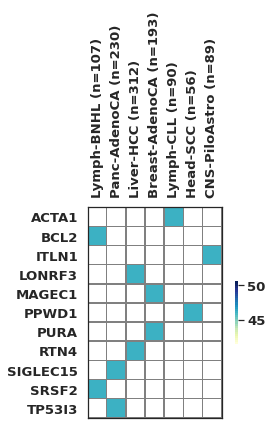

In [22]:
draw_heatmap_syn_top(df_pivot_syn_top.transpose())

---------------
### Suppfig1 - Individual genes(expression/ceres test)

PURA expression

In [13]:
dict_pura = pickle.load(open(os.path.join(dir_in, 'dict_pura.pkl'),'rb'))
dict_siglec15 = pickle.load(open(os.path.join(dir_in, 'dict_siglec15.pkl'),'rb'))

In [14]:
def format_fig(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [17]:
### PURA
plt.figure(figsize = (10,5))
ax1 = plt.subplot(121)
ax1 = sns.boxplot(x = 'tumor.normal', y = 'exp', data = dict_pura['df_exp'])
ax1.set_xticklabels(['Normal(n = 6)','Tumor(n = 85)']); ax1.set_ylabel('PURA expression(FPKM)');ax1.set_xlabel('')
format_fig(ax1)
text = f'p-value = {round(dict_pura["pval"],6)}'
ax1.annotate(text, (0.8,15),horizontalalignment="right",)

### SIGLEC15
ax2 = plt.subplot(122)
ax2 = sns.boxplot(x = 'variable', y = 'value', data = dict_siglec15['df_exp'])
ax2.set_xticklabels(['Pancreas Lineage\n(n = 44)','Other Lineage\n(n = 945)'])
ax2.set_ylabel('SIGLEC15 expression(log2(TPM+1))');ax2.set_xlabel('')
format_fig(ax2)
text = f'p-value = {round(dict_siglec15["pval"],6)}'
ax2.annotate(text, (0.7,8),horizontalalignment="right",)

plt.tight_layout()
plt.savefig(os.path.join(dir_out,f'figs2.pdf'))
plt.show()
plt.close()

In [33]:
dict_magec1['df_exp'][]

,id,exp,tumor.normal
0,61c8278b-4c06-4563-b1ac-97cceec76ca4,0.003575,normal
1,5462aaff-d060-4ba7-9ab5-0e6977accb91,0.000000,normal
2,75ba5803-449e-4770-8105-b675af8e6907,0.040509,normal
3,02222fea-f3da-4328-8188-8ef24d1f55e4,0.000000,normal
4,58e94be5-2da2-4a96-944a-060f20216572,0.019236,normal
...,...,...,...
79,42e2160c-07b5-4be6-a989-1e3474926d2a,0.000000,tumor_other
80,79d7a589-60bd-4b4a-89c1-d557fe24c733,0.000000,tumor_other
81,B5B8FDD8-C4DF-4F79-AED5-23AC41F75F18,0.019290,tumor_other
82,ef37a73c-e0a0-4ff6-83a3-6befcdcb51c6,0.000000,tumor_other
